In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv('./amazon_india_soft_toys_cleaned.csv')

In [8]:
from warnings import filterwarnings
filterwarnings('ignore')

### 1. Brand Performance Analysis

In [3]:
brand_counts = df["Brand"].value_counts().reset_index()
brand_counts.columns = ["Brand", "Frequency"]

In [5]:
brand_avg_rating = df.groupby("Brand")["Rating"].mean().reset_index().sort_values(by="Rating", ascending=False)


In [6]:
brand_summary = pd.merge(brand_counts, brand_avg_rating, on="Brand")
top_5_brands = brand_summary.nlargest(5, "Frequency")

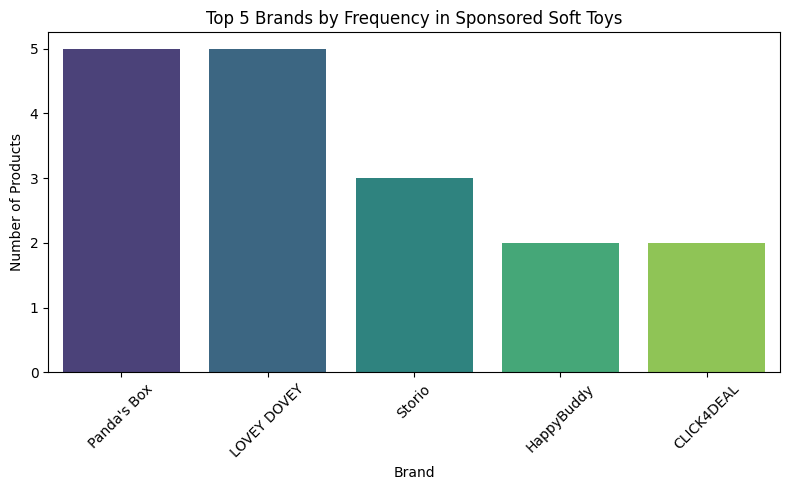

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(data=top_5_brands, x="Brand", y="Frequency", palette="viridis")
plt.title("Top 5 Brands by Frequency in Sponsored Soft Toys")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

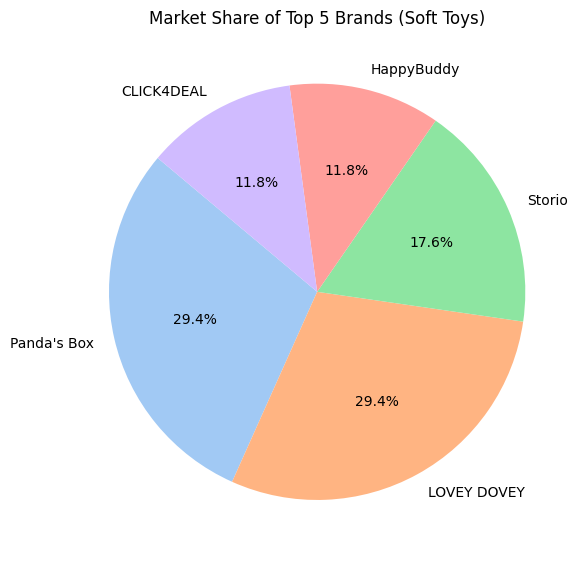

In [10]:
plt.figure(figsize=(6, 6))
plt.pie(top_5_brands["Frequency"], labels=top_5_brands["Brand"], autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Market Share of Top 5 Brands (Soft Toys)")
plt.tight_layout()
plt.show()

In [11]:
low_freq_high_rating = brand_summary[(brand_summary["Frequency"] < 3) & (brand_summary["Rating"] >= 4.0)]
print("\nHigh-rated but underrepresented brands:\n", low_freq_high_rating.sort_values(by="Rating", ascending=False))



High-rated but underrepresented brands:
                          Brand  Frequency  Rating
8                  BLISS BABEE          1     4.8
11                 abracadabra          1     4.8
5   Amazon Brand - Jam & Honey          1     4.4
7       HUG 'n' FEEL SOFT TOYS          1     4.4
10                       Webby          1     4.4
12                 Thrive Toys          1     4.3
4                   CLICK4DEAL          2     4.1
6             TechMax Solution          1     4.1


### 2. Price vs. Rating Analysis

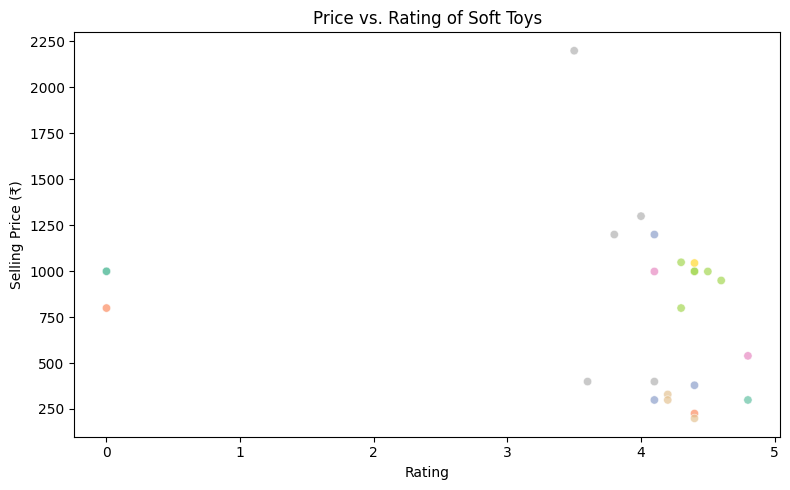

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Rating", y="Selling Price", hue="Brand", alpha=0.7, palette="Set2", legend=False)
plt.title("Price vs. Rating of Soft Toys")
plt.xlabel("Rating")
plt.ylabel("Selling Price (₹)")
plt.tight_layout()
plt.show()

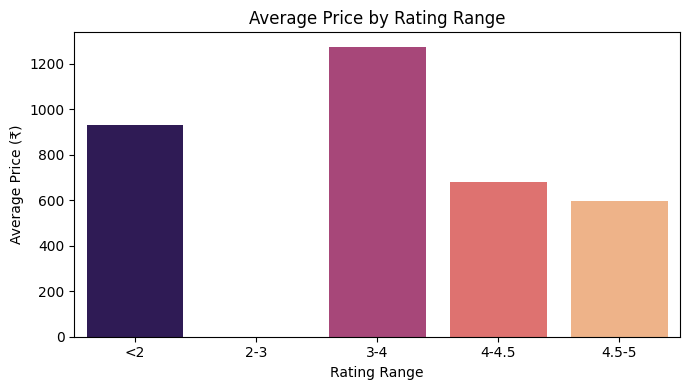

In [13]:
# Create rating bins
bins = [0, 2, 3, 4, 4.5, 5]
labels = ["<2", "2-3", "3-4", "4-4.5", "4.5-5"]
df["Rating Range"] = pd.cut(df["Rating"], bins=bins, labels=labels, include_lowest=True)

# Average price by rating range
avg_price_by_rating = df.groupby("Rating Range")["Selling Price"].mean().reset_index()

# --- BAR CHART: Avg Price by Rating Range ---
plt.figure(figsize=(7, 4))
sns.barplot(data=avg_price_by_rating, x="Rating Range", y="Selling Price", palette="magma")
plt.title("Average Price by Rating Range")
plt.xlabel("Rating Range")
plt.ylabel("Average Price (₹)")
plt.tight_layout()
plt.show()


In [16]:
high_value = df[(df["Rating"] >= 4.5) & (df["Selling Price"] < df["Selling Price"].median())]
low_value = df[(df["Rating"] < 3.0) & (df["Selling Price"] > df["Selling Price"].median())]

print("\n📈 High-Value Products (Low Price, High Rating):")
print(high_value[["Title", "Brand", "Rating", "Selling Price"]].sort_values(by="Rating", ascending=False).head(5))

print("\n⚠️ Overpriced but Low-Rated Products:")
print(low_value[["Title", "Brand", "Rating", "Selling Price"]].sort_values(by="Selling Price", ascending=False).head(5))


📈 High-Value Products (Low Price, High Rating):
                                                Title        Brand  Rating  \
11  BLISS BABEE Cute Teddy Bear Soft Toy for Baby ...  BLISS BABEE     4.8   
21  abracadabra Organics Collectible Cuddle Toy (1...  abracadabra     4.8   

    Selling Price  
11            299  
21            539  

⚠️ Overpriced but Low-Rated Products:
                                               Title       Brand  Rating  \
0  HappyBuddy Talking Plush Toy Lenny The Lion | ...  HappyBuddy     0.0   
1  HappyBuddy Talking Plush Toy Dottie The Deer |...  HappyBuddy     0.0   

   Selling Price  
0            999  
1            999  


### 3. Review & Rating Distribution

In [17]:
top_reviewed = df.sort_values(by="Reviews", ascending=False).head(5)

# Sort for Top 5 Rated Products
top_rated = df[df["Rating"] >= 4.0].sort_values(by="Rating", ascending=False).head(5)

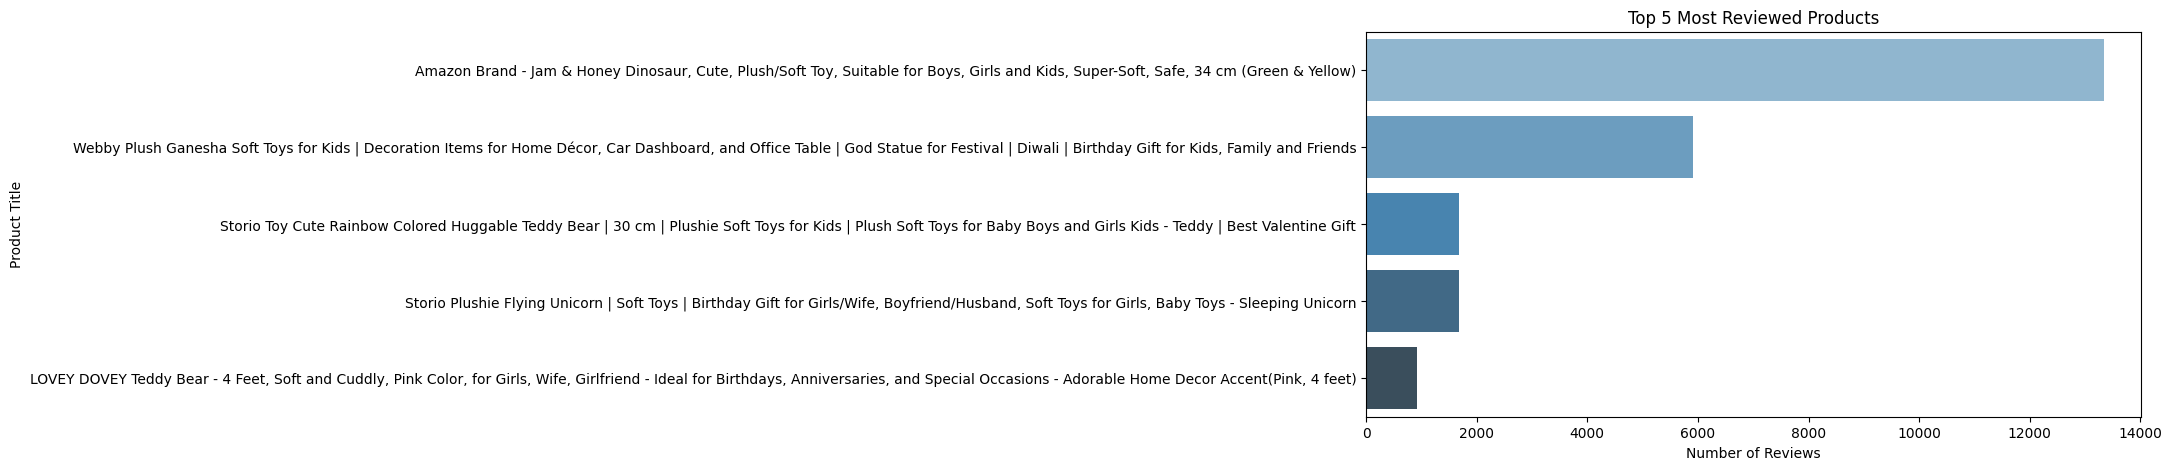

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_reviewed, y="Title", x="Reviews", palette="Blues_d")
plt.title("Top 5 Most Reviewed Products")
plt.xlabel("Number of Reviews")
plt.ylabel("Product Title")
plt.tight_layout()
plt.show()

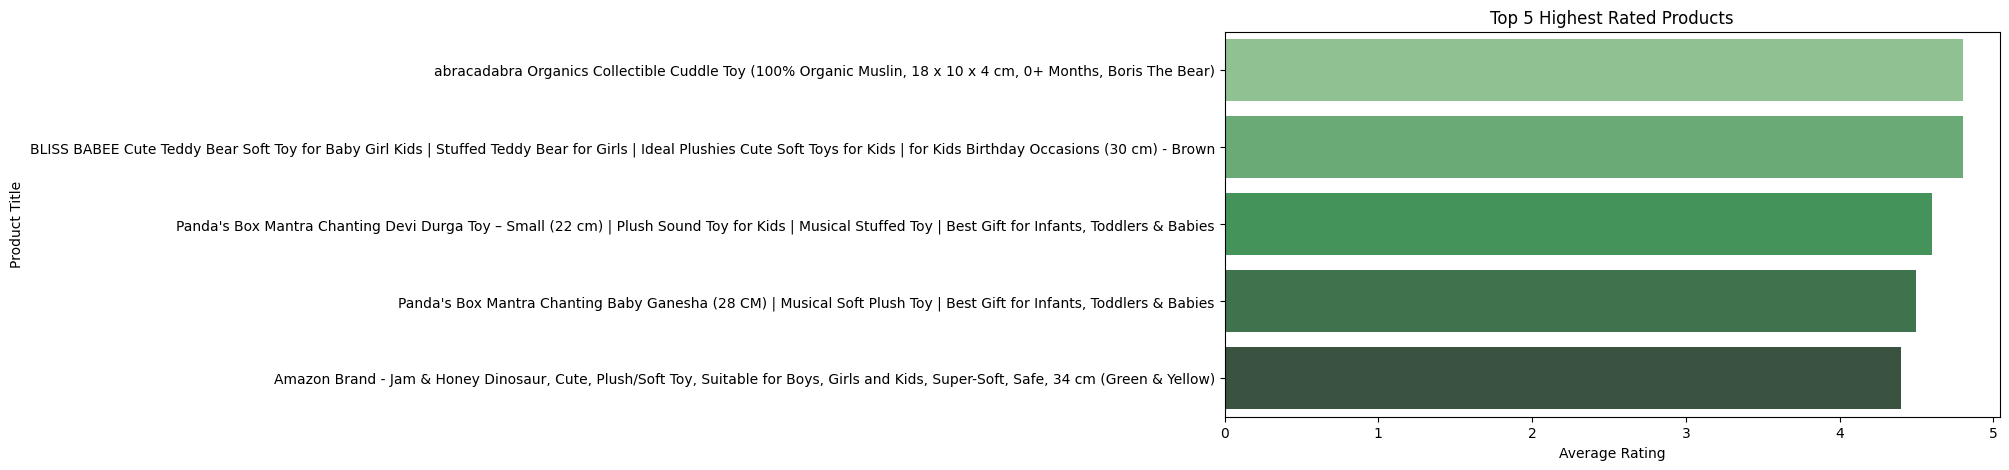

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_rated, y="Title", x="Rating", palette="Greens_d")
plt.title("Top 5 Highest Rated Products")
plt.xlabel("Average Rating")
plt.ylabel("Product Title")
plt.tight_layout()
plt.show()

In [21]:
print("\n🛍️ Top 5 Most Reviewed Products:")
print(top_reviewed[["Title", "Brand", "Reviews", "Rating"]])

print("\n⭐ Top 5 Highest Rated Products:")
print(top_rated[["Title", "Brand", "Rating", "Reviews"]])


🛍️ Top 5 Most Reviewed Products:
                                                Title  \
2   Amazon Brand - Jam & Honey Dinosaur, Cute, Plu...   
20  Webby Plush Ganesha Soft Toys for Kids | Decor...   
7   Storio Toy Cute Rainbow Colored Huggable Teddy...   
19  Storio Plushie Flying Unicorn | Soft Toys | Bi...   
17  LOVEY DOVEY Teddy Bear - 4 Feet, Soft and Cudd...   

                         Brand  Reviews  Rating  
2   Amazon Brand - Jam & Honey    13343     4.4  
20                       Webby     5903     4.4  
7                       Storio     1687     4.2  
19                      Storio     1687     4.2  
17                 LOVEY DOVEY      921     3.8  

⭐ Top 5 Highest Rated Products:
                                                Title  \
21  abracadabra Organics Collectible Cuddle Toy (1...   
11  BLISS BABEE Cute Teddy Bear Soft Toy for Baby ...   
5   Panda's Box Mantra Chanting Devi Durga Toy – S...   
14  Panda's Box Mantra Chanting Baby Ganesha (28 C...   
2   A